# AI Final Project - Heart Failure

### A Detailed & Comprehensive Report

## Kiana Ghamsari 400222079

---

- **Project Title:**

    - **"Prediction and Diagnosis of Heart Failure in Individuals Using Machine Learning Techniques"**

<br>

- **Objective:**

    - The objective of this project is to develop a machine learning-based model for predicting and diagnosing heart failure in individuals based on various health-related features. The model will be trained using historical data containing patient health information and will aim to classify individuals into two categories: those with heart disease (represented by `1`) and those without heart disease (represented by `0`). The project will explore multiple machine learning algorithms, evaluate their performance, and select the best model for accurate diagnosis.



## Import necessary libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import time

## Load the datasets

In [21]:
# Load dataset
df = pd.read_csv("/kaggle/input/heartdataset/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [22]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [23]:
Numericals = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categoricals = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
target = ['HeartDisease']

In [24]:
num_features = df[Numericals]
num_features

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [25]:
cat_features = df[Categoricals]
cat_features

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [26]:
df[target]

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


---

## Inspect dataset

In [27]:
print("Initial Dataset Info:")
print(df.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


### Check if there exist missing values

In [28]:
missing_values = df.isnull().sum()

print("\nMissing Values:")
print(missing_values)

if missing_values[missing_values > 0].empty:
    print('\nNo missing values!')
else:
    print(missing_values[missing_values > 0])


Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No missing values!


- **Fortunately, there is no missing value!**

In [29]:
# # Handling missing values
# num_imputer = SimpleImputer(strategy='mean')
# num_features = num_imputer.fit_transform(Numericals))

# cat_imputer = SimpleImputer(strategy='most_frequent')
# cat_features = cat_imputer.fit_transform(Categoricals))

# # Verify missing values handled
# print("\nMissing Values After Imputation:")
# print(df.isnull().sum())

### Data Distribution Analysis

Age


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


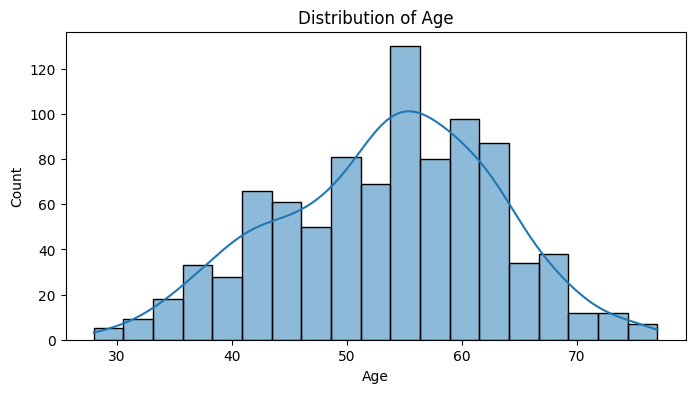

RestingBP


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


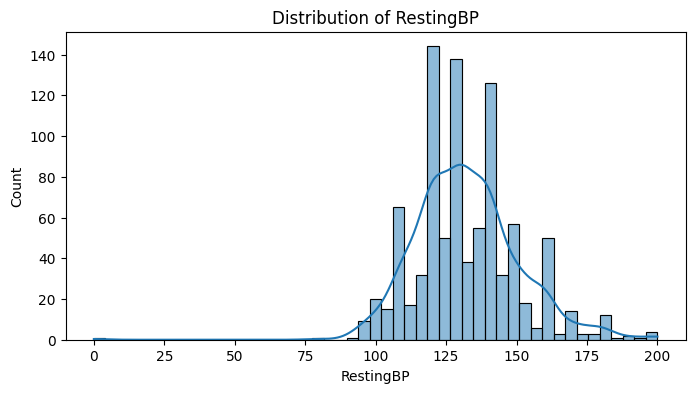

Cholesterol


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


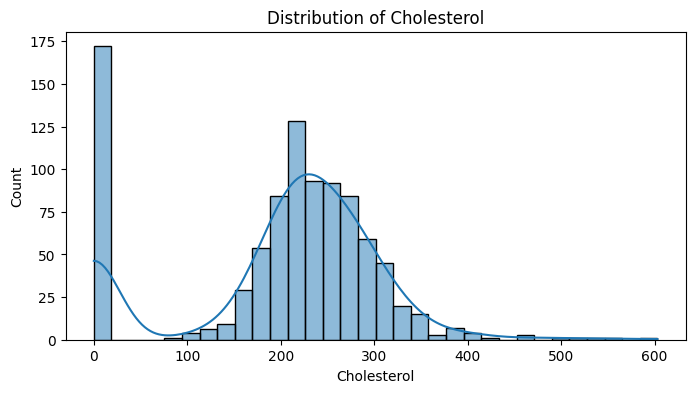

FastingBS


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


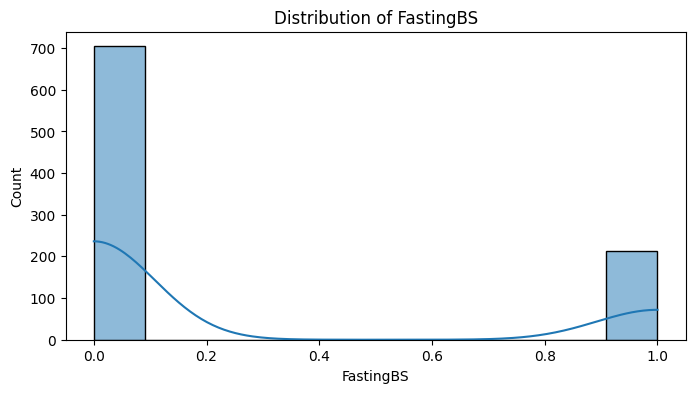

MaxHR


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


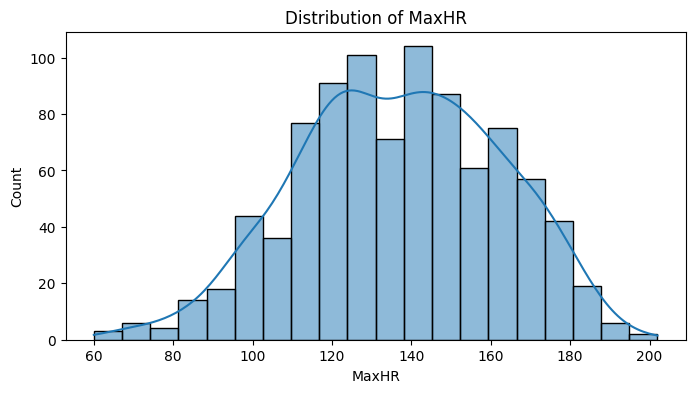

Oldpeak


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


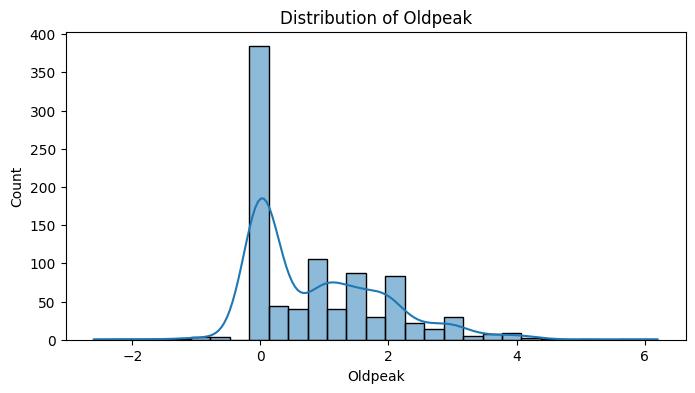

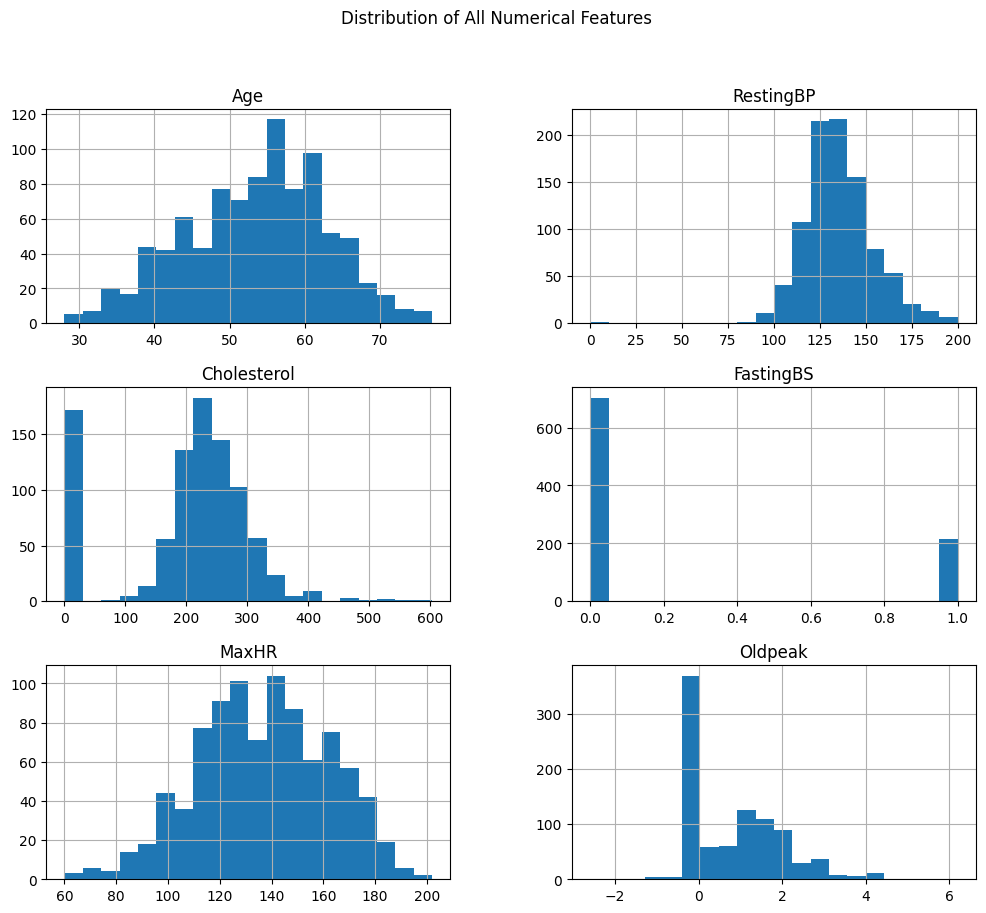

In [30]:
# Histograms for numerical features
for column in Numericals:
    print(column)
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True) # * using kde
    plt.title(f"Distribution of {column}")
    plt.show()


df[Numericals].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of All Numerical Features")
plt.show()

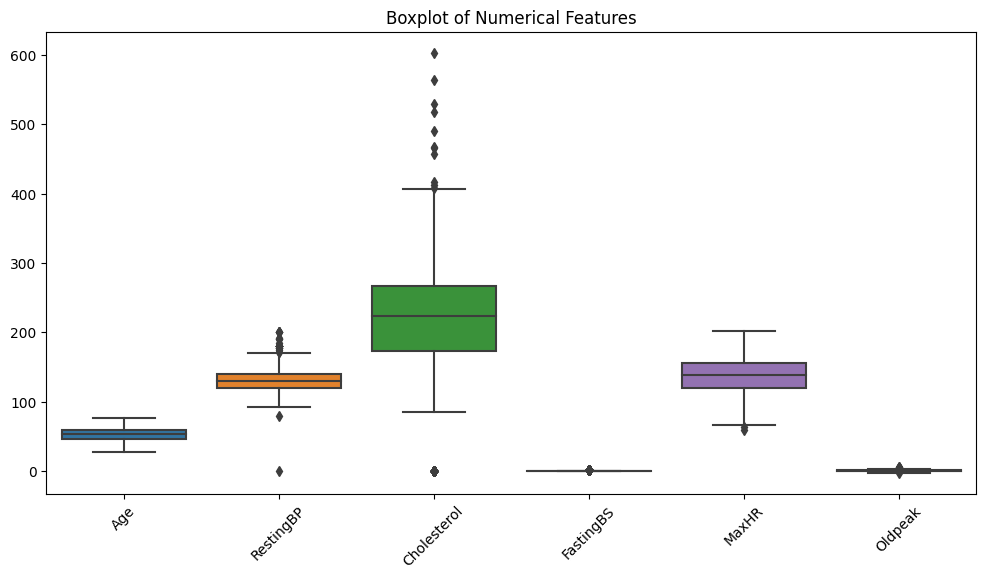

In [31]:
# Boxplots to detect outliers before using StandardScaler:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[Numericals])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

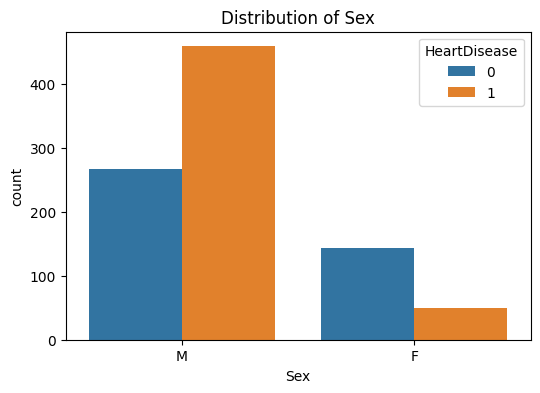

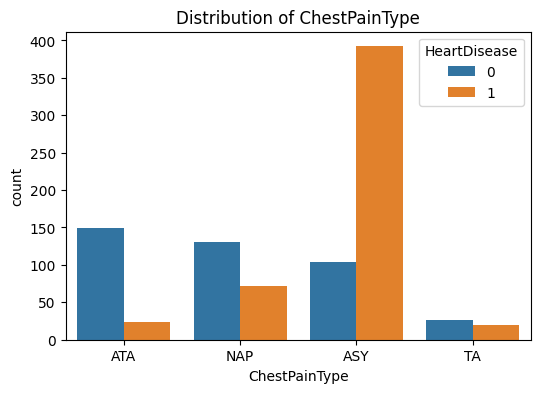

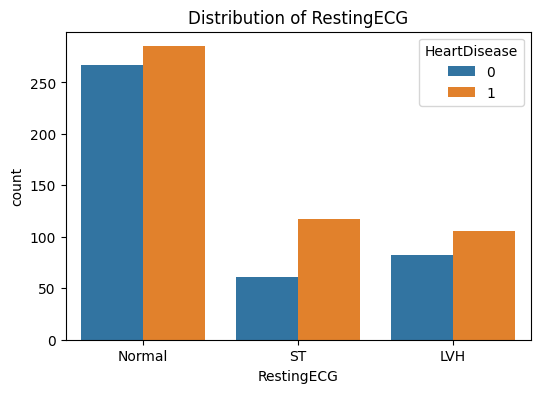

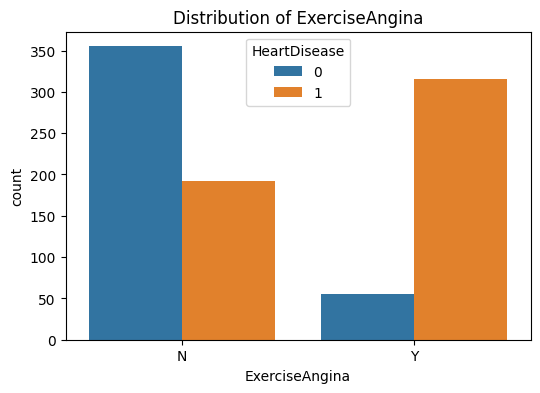

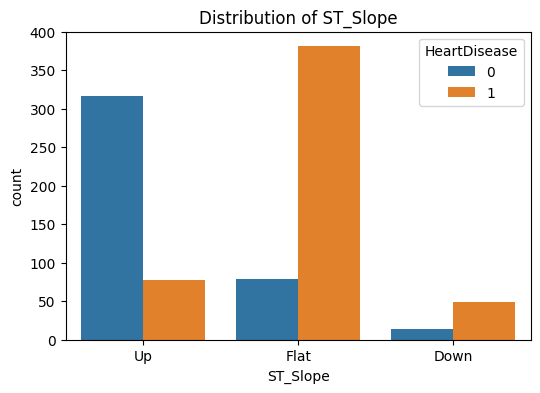

In [32]:
# Count plots for categorical features
for col in Categoricals:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df['HeartDisease'])
    plt.title(f"Distribution of {col}")
    plt.show()

### Encoding categorical variables

In [34]:
# Encoding categorical variables
binary_cols = ['Sex', 'ExerciseAngina']  # Binary categories
multi_cat_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']  # Multi-category variables

In [35]:
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-category variables
df = pd.get_dummies(df, columns=multi_cat_cols, dtype=int)

In [36]:
# Standardizing numerical features
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

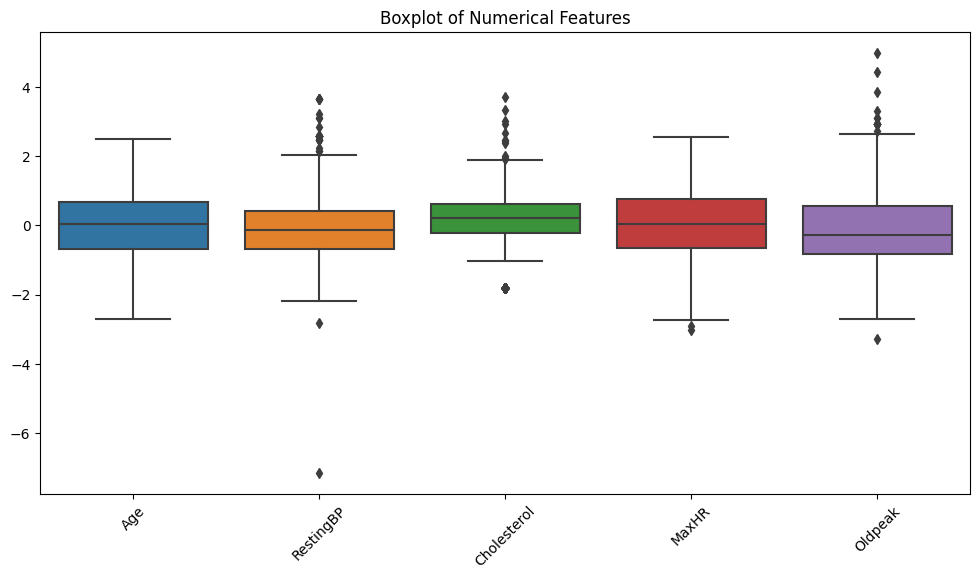

In [37]:
# Boxplots to detect outliers after using StandardScaler:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [38]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,-0.832432,0,0,1,0,0,0,1,0,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,0.105664,1,0,0,1,0,0,1,0,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,-0.832432,0,0,1,0,0,0,0,1,0,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,0.574711,1,1,0,0,0,0,1,0,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,-0.832432,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.210356,0.596393,0,-0.188999,0,0.293283,1,0,0,0,1,0,1,0,0,1,0
914,1.536902,1,0.627078,-0.053049,1,0.164684,0,2.357094,1,1,0,0,0,0,1,0,0,1,0
915,0.370100,1,-0.129513,-0.620168,0,-0.857069,1,0.293283,1,1,0,0,0,0,1,0,0,1,0
916,0.370100,0,-0.129513,0.340275,0,1.461525,0,-0.832432,1,0,1,0,0,1,0,0,0,1,0


### Correlation Analysis

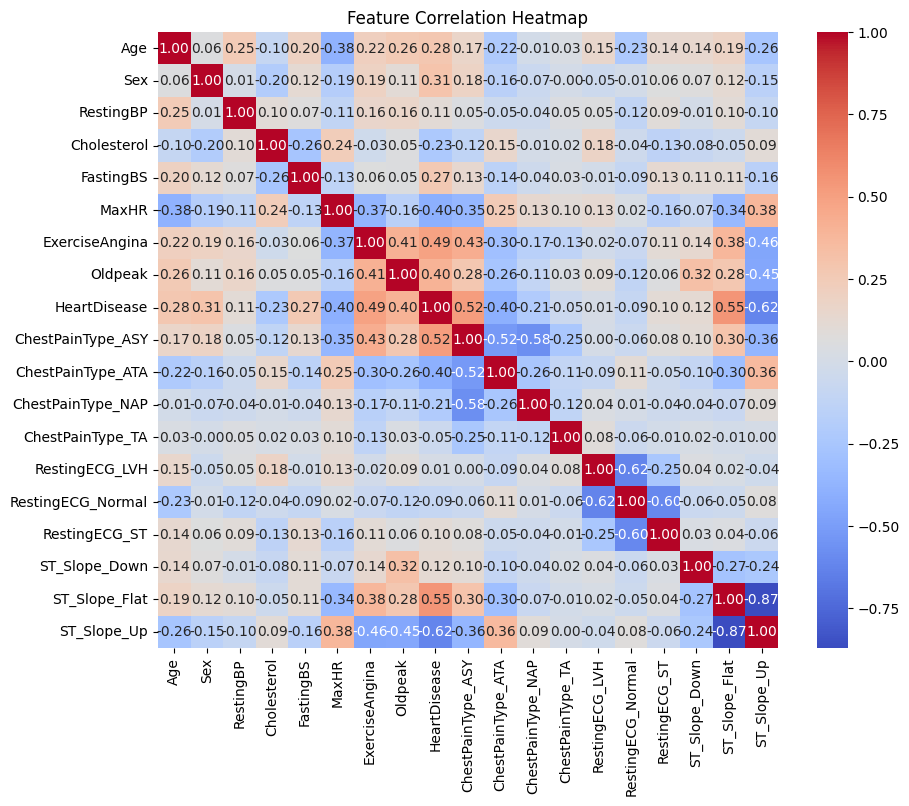

In [39]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Features and target

In [40]:
# Features and target
y = df[target]
X = df.drop(target, axis=1)

In [41]:
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=y.values.reshape((-1, )).astype(object),
    width=600, height=480
)
fig.show()

fig = px.scatter(
    projections, x=0, y=1,
    color=y.values.reshape((-1, )).astype(int),
    width=600, height=480
)
fig.show()

In [42]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y.values.reshape((-1, )).astype(int),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=600, height=480
)

fig.show()

---

### Feature Ranking using Random Forest

In [43]:
# Feature Ranking using Random Forest
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

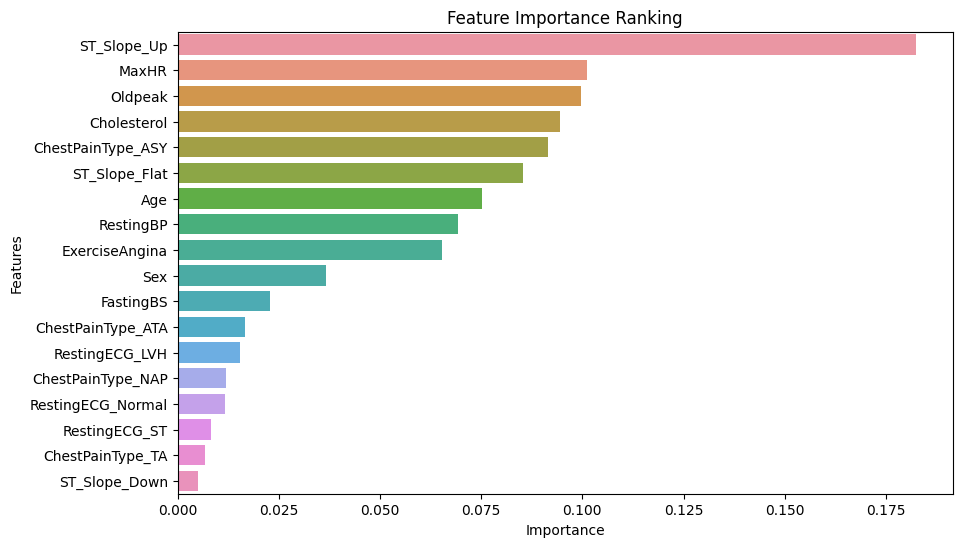

In [45]:
# Feature Importance Visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title("Feature Importance Ranking")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

### Using DecisionTreeClassifier

In [46]:
feature_names = X.columns

model = DecisionTreeClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
display(feature_importances_df)

,Feature,Importance
17,ST_Slope_Up,0.387088
3,Cholesterol,0.129381
5,MaxHR,0.091103
2,RestingBP,0.075364
8,ChestPainType_ASY,0.068116
7,Oldpeak,0.060343
0,Age,0.056462
1,Sex,0.035998
4,FastingBS,0.027799
6,ExerciseAngina,0.025193


---

## Clustering

### PCA for Dimensionality Reduction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



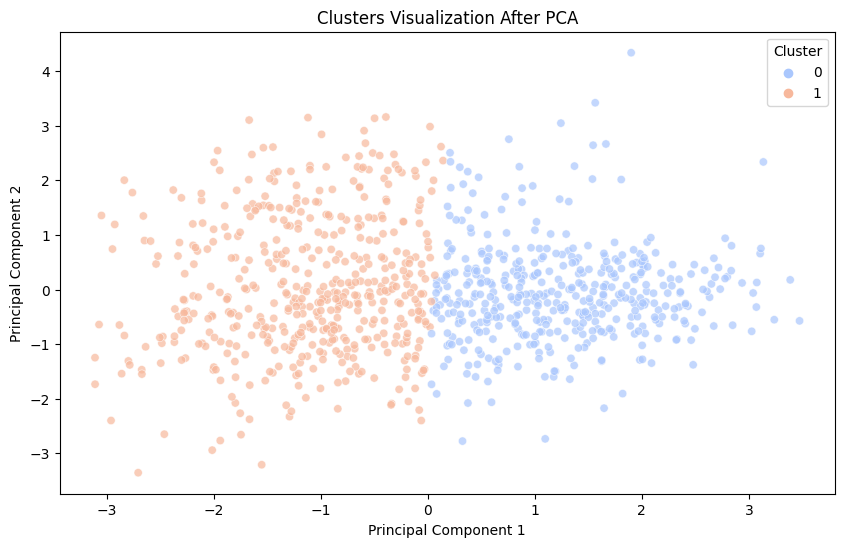

In [47]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='coolwarm', alpha=0.7)
plt.title("Clusters Visualization After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


---

### Split into train and test sets

In [48]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")

Training data: 734 samples
Testing data: 184 samples


### Train the Models

#### 1: Decision Tree Classifier

In [49]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.8098


#### 2: Logistic Regression

In [50]:
# Initialize and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.8533


#### 3: XGBoost Classifier

In [52]:
# Initialize and train the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.8859


#### 4: Support Vector Machine (SVM)

In [53]:
# Initialize and train the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.8696


### Model Comparison and Evaluation

In [54]:
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Decision Tree Accuracy: 0.8098
Logistic Regression Accuracy: 0.8533
XGBoost Accuracy: 0.8859
SVM Accuracy: 0.8696


---

### Using Hyperparameter Tuning

#### 1: Hyperparameter Tuning for Decision Tree

In [55]:
# Initialize DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best Parameters for Decision Tree: {best_params_dt}")
print(f"Best Cross-Validation Score for Decision Tree: {best_score_dt:.4f}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Score for Decision Tree: 0.8338


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



#### 2: Hyperparameter Tuning for Logistic Regression

In [56]:
# Initialize LogisticRegression
lr_model = LogisticRegression(random_state=42)

# Define the parameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best Parameters for Logistic Regression: {best_params_lr}")
print(f"Best Cross-Validation Score for Logistic Regression: {best_score_lr:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score for Logistic Regression: 0.8624


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

#### 3: Hyperparameter Tuning for XGBoost

In [57]:
# Initialize XGBoostClassifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Best Cross-Validation Score for XGBoost: {best_score_xgb:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Score for XGBoost: 0.8733


#### 4: Hyperparameter Tuning for Support Vector Machine (SVM)

In [58]:
# Initialize SVM
svm_model = SVC(probability=True, random_state=42)

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.5]
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best Parameters for SVM: {best_params_svm}")
print(f"Best Cross-Validation Score for SVM: {best_score_svm:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score for SVM: 0.8760


#### 5: Evaluate the Best Models on the Test Set

In [62]:
# Best model for Decision Tree
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_best = best_dt_model.predict(X_test)
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
print(f"Decision Tree Test Accuracy (after tuning): {best_score_dt:.4f}")

# Best model for Logistic Regression
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr_best = best_lr_model.predict(X_test)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
print(f"Logistic Regression Test Accuracy (after tuning): {best_score_lr:.4f}")

# Best model for XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_test)
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
print(f"XGBoost Test Accuracy (after tuning): {best_score_xgb:.4f}")

# Best model for SVM
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"SVM Test Accuracy (after tuning): {best_score_svm:.4f}")


print("\nBest parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best parameters for SVM:", grid_search_svm.best_params_)


Decision Tree Test Accuracy (after tuning): 0.8338
Logistic Regression Test Accuracy (after tuning): 0.8624
XGBoost Test Accuracy (after tuning): 0.8733
SVM Test Accuracy (after tuning): 0.8760

Best parameters for Decision Tree: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


---

## Interpretation

### 1: Evaluate Model Performance Using Metrics

In [64]:
# For Decision Tree
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# For Logistic Regression
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# For XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# For SVM
y_pred_svm = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Display the performance metrics
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-Score: {f1_dt:.4f}")
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-Score: {f1_lr:.4f}")
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-Score: {f1_xgb:.4f}")
print(f"SVM - Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1-Score: {f1_svm:.4f}")


Decision Tree - Accuracy: 0.8098, Precision: 0.8830, Recall: 0.7757, F1-Score: 0.8259
Logistic Regression - Accuracy: 0.8533, Precision: 0.9000, Recall: 0.8411, F1-Score: 0.8696
XGBoost - Accuracy: 0.8804, Precision: 0.9048, Recall: 0.8879, F1-Score: 0.8962
SVM - Accuracy: 0.8696, Precision: 0.8879, Recall: 0.8879, F1-Score: 0.8879


### 2: Compare Models Based on Metrics and Time

In [65]:
# Track time taken for training each model
start_time = time.time()
best_dt_model.fit(X_train, y_train)
dt_train_time = time.time() - start_time

start_time = time.time()
best_lr_model.fit(X_train, y_train)
lr_train_time = time.time() - start_time

start_time = time.time()
best_xgb_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time

start_time = time.time()
best_svm_model.fit(X_train, y_train)
svm_train_time = time.time() - start_time

# Compare performance metrics and training times
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-Score: {f1_dt:.4f}, Training Time: {dt_train_time:.4f}s")
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-Score: {f1_lr:.4f}, Training Time: {lr_train_time:.4f}s")
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-Score: {f1_xgb:.4f}, Training Time: {xgb_train_time:.4f}s")
print(f"SVM - Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1-Score: {f1_svm:.4f}, Training Time: {svm_train_time:.4f}s")

Decision Tree - Accuracy: 0.8098, Precision: 0.8830, Recall: 0.7757, F1-Score: 0.8259, Training Time: 0.0066s
Logistic Regression - Accuracy: 0.8533, Precision: 0.9000, Recall: 0.8411, F1-Score: 0.8696, Training Time: 0.0154s
XGBoost - Accuracy: 0.8804, Precision: 0.9048, Recall: 0.8879, F1-Score: 0.8962, Training Time: 0.0378s
SVM - Accuracy: 0.8696, Precision: 0.8879, Recall: 0.8879, F1-Score: 0.8879, Training Time: 0.0725s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



### 3: ROC Curve and AUC Score

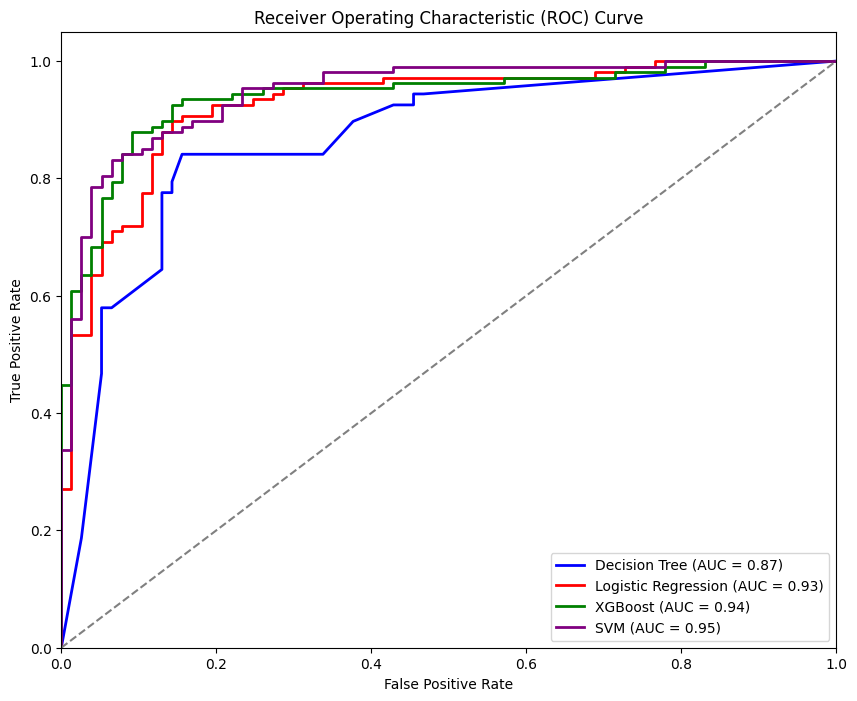

In [67]:
# Compute ROC curve and AUC for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()